<a href="https://colab.research.google.com/github/GwanMuk/AI_Study24/blob/master/k_%EC%B5%9C%EA%B7%BC%EC%A0%91%ED%95%9C%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,153 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and dire

전에 농어 무게를 예측하는 k-최근접 알고리즘을 사용해서 회귀 모델을 사용해 본 결과 정확한 예측이 어려울 수 있다는 결론이 생김 (원본데이터의 갯수 부족)

길이가 50cm인 농어가 들어왔을 때의 회귀는 어떻게 될까?? (한계점이 생긴다)

In [2]:
import numpy as np

# 넘파이를 이용해서 배열을 생성함
# 농어의 데이터가 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 사이킷런을 이용해서 훈련세트와 테스트 세트를 나눔.

from sklearn.model_selection import train_test_split

# https://blog.naver.com/siniphia/221396370872
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
# 2차원 배열로 만들어야 함
# -1로 지정하면 원소 개수로 모두 채우라는 의미, 1은 두번째 크기를 1로(특성)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘용 구현 클래스

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
# 사이킷 런의 k-최근접이웃 기본값이 5인데 이것을 3으로 변경
# 이웃의 갯수를 3으로 설정합니다

print(knr.predict([[50]]))  # 50cm인 농어의 무게를 예측한 결과 1,033g

[1033.33333333]


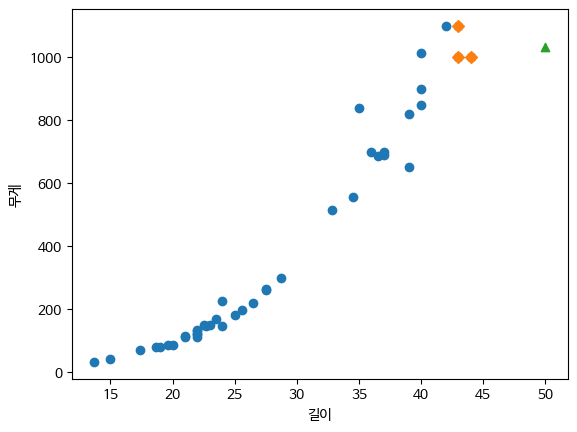

In [10]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글 처리

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)

# 훈련 세트중에서 이웃 샘플만 다시 그림
plt. scatter(train_input[indexes], train_target[indexes], marker= 'D')

# 50cm농어 데이터
plt.scatter(50, 1033, marker= '^')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [11]:
print(np.mean(train_target[indexes]))   # 45cm 근방으로 평균값이 나옴

1033.3333333333333


In [13]:
print(knr.predict([[100]]))             # 100cm짜리 결과

[1033.33333333]


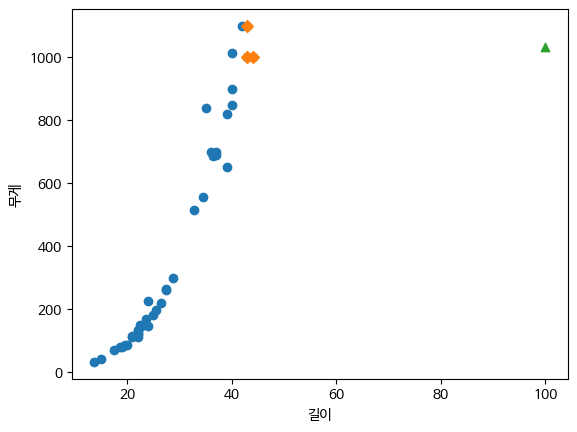

In [15]:
# 결론은 기본 데이터의 부족으로 한계가 생김

# 100cm농어의 이웃을 구합니다
distance, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

#훈련 세트중에서 이웃샘플만 다시 그립니다
plt. scatter(train_input[indexes], train_target[indexes], marker= 'D')

# 100cm농어 데이터
plt.scatter(100, 1033, marker= '^')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [ ]:
# k-최근접 이웃 알고리즘의 대안 -> 선형 회귀

In [17]:
# 선형회귀(linear) 비교적 간단하게 성능이 뛰어남
# 선형이라는 말에서 짐작 할 수 있듯이 직선을 학습하는 알고리즘
# 빨간선이 가로로 되어 있으면 농어의 무게를 1개로 인식함
# 빨간선이 위에서 시작해서 아래로 떨어지면 반대로 예측
# 빨간선이 아래에서 시작해서 위로 올라가면 정상적인 차트로 구현

# 사이킷런에서 제공하는 클래스르 사용해보자
from sklearn.linear_model import LinearRegression
# LinearRegression 선형 회귀용

lr = LinearRegression() # 선형 회귀용 객체 생성하여 변수에 연결
lr.fit(train_input, train_target) # 선형 회귀용으로 훈련 시작

LinearRegression()

In [18]:
print(lr.predict([[50]]))
# 농어의 무게 기울기 + 절편(y(농어의 무게) = a * x(농어의 길이) + b)
# 직선의 방정식

[1241.83860323]


In [19]:
print(lr.coef_, lr.intercept_)  # lr.coef_ 계수, lr.intercept_인터셉트
# 기울기를 종종 계수(coefficent),가중치(weight)라고 부른다

[39.01714496] -709.0186449535477


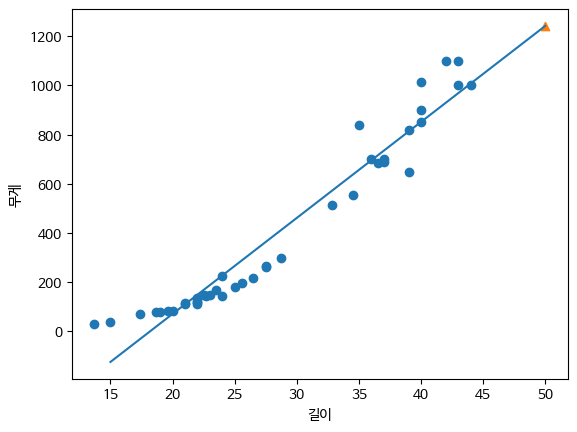

In [20]:
# 그래프로 확인 해보자.
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm농어 데이터
plt.scatter(50, 1241.8, marker= '^')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [21]:
# 예측은 가능하나 1차 방정식이라 값이 너무 직선적으로 나옴

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 훈련세트가 테스트에 비해 높지만 차이가 많이 남 -> 과소적합이라고 함

0.939846333997604
0.8247503123313558


In [ ]:
# 다항회귀(Polynomial Regression)

In [22]:
# 다항회귀는 2차원 방정식의 그래프로 그리려면
# 길이를 제곱한 항이 훈련세트에 추가 되어야 함

#선형회귀의 문제점은 왼쪽 하단에 있는 기준점이 불일치된다
# -> 곡선으로 만들어야 함
train_poly = np.column_stack((train_input ** 2, train_input))
# 제곱한 것과 두 배열을 나란히 붙인다
test_poly = np.column_stack((test_input**2,test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [24]:
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [25]:
lr = LinearRegression()           # 선형 회귀로 객체 생성
lr.fit(train_poly, train_target)  # 훈련 시작

print(lr.predict([[50**2, 50]]))  # 결과 테스트
# 테스트 할 때 이 모델의 농어길이의 제곱과 원래 길이를 함께 넣음

[1573.98423528]


In [ ]:
# 농어의 무게 기울기 + 절편
# (y(농어의 무게) = a * x(농어의 길이) + b)
print(lr.coef_, lr.intercept_)  # # lr.coef_ 계수, lr.intercept_인터셉트

In [ ]:
# 1573.98 = 1.01 * 50 ** 2 -21.55 * 50 + 116.05

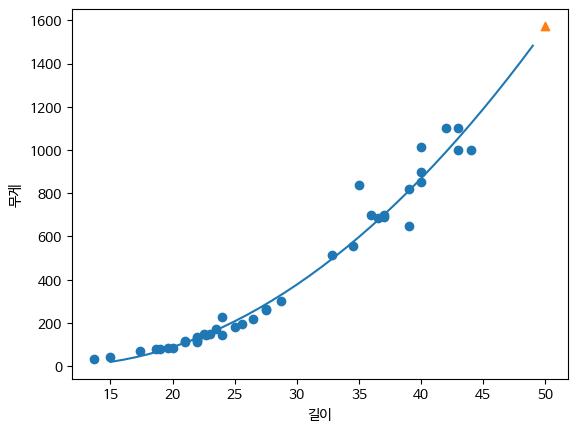

In [26]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01 * point ** 2 -21.6 * point + 116.05 )  # 다항회귀 공식 적용
# 50cm농어 데이터
plt.scatter([50], [1574], marker= '^')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [27]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))

# 문제 해결을 위해 선형회귀와 다항 회귀를 통해 문제를 해결하려고 했다
# 하지만 아직 모델에 과속적합이 남아있다.
# 이를 해결하기 위해 조금 더 복잡한 모델을 만들어야 할 것 같다.
# 또 복잡한 모델을 만들다가 너무 복잡해진 경우
# 모델의 복잡도를 억제하는 방법도 알아봐야 할 것 같다.

0.9706807451768623
0.9775935108325122
